# **GRU Exercise**

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam



## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [6]:
df=pd.read_csv('/content/traffic (3).csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [7]:
df.shape

(48120, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [10]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [11]:
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [12]:
df.sample(5)

,DateTime,Junction,Vehicles,ID
10586,2017-01-15 02:00:00,1,31,20170115021
19261,2016-05-13 13:00:00,2,17,20160513132
45638,2017-03-19 14:00:00,4,8,20170319144
28449,2017-05-31 09:00:00,2,18,20170531092
15559,2015-12-11 07:00:00,2,4,20151211072


In [13]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour

## Feature Engineering (if needed)







In [14]:
date = df['Vehicles']

## Exploratory Data Analysis


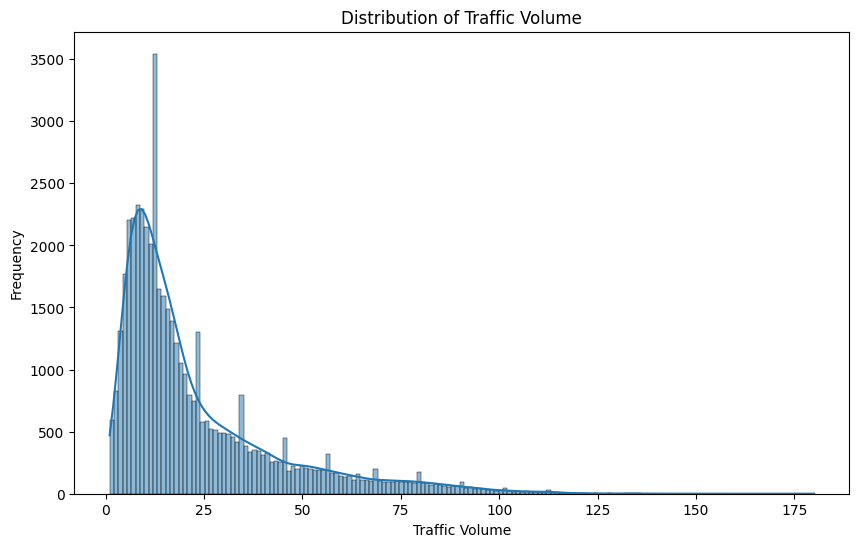

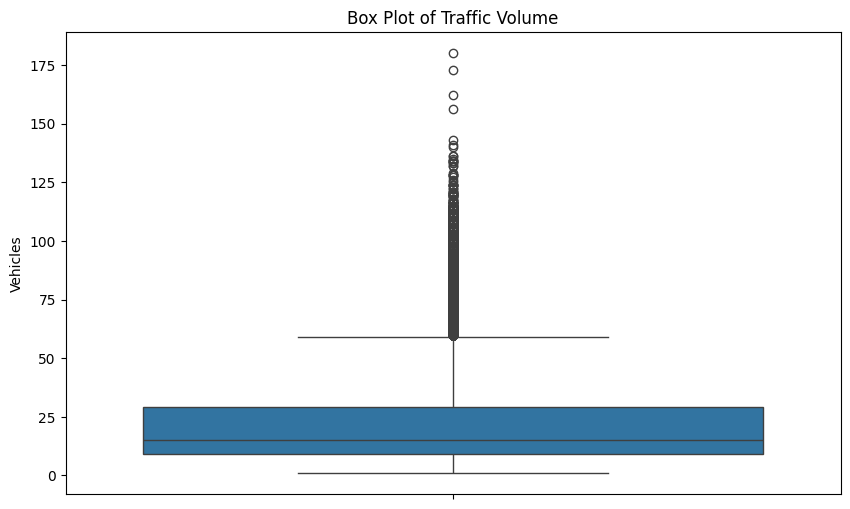

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicles'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['Vehicles'])
plt.title('Box Plot of Traffic Volume')
plt.show()

## split into train and test sets

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(date.values.reshape(-1, 1))

In [17]:
x=df.drop('Vehicles',axis=1)
y=df['Vehicles']

In [18]:

from sklearn.model_selection import TimeSeriesSplit

X = df.drop('Vehicles', axis=1)
y = df['Vehicles']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through splits (adjust n_splits as needed)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [19]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
sed_len = 24
x,y=create_sequences(scaled_data,sed_len)
x=x.reshape(x.shape[0],x.shape[1],1)
split = int(0.8 * len(x))
X_train, X_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - loss: 0.0022 - val_loss: 9.2758e-04
Epoch 2/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 7.1327e-04 - val_loss: 8.4834e-04
Epoch 3/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 53s 44ms/step - loss: 7.0891e-04 - val_loss: 8.1464e-04
Epoch 4/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - loss: 6.7802e-04 - val_loss: 7.7038e-04
Epoch 5/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - loss: 6.0306e-04 - val_loss: 8.3082e-04
Epoch 6/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 5.7858e-04 - val_loss: 7.7158e-04
Epoch 7/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 5.9889e-04 - val_loss: 7.5434e-04
Epoch 8/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - loss: 5.6699e-04 - val_loss: 8.0464e-04
Epoch 9/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 5.4672e-04 - val_loss: 7.4712e-04
Epoch 10/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 5.5026e-04 - val_loss: 7.5215e-04


## Fitting The Model



In [21]:
y_pred = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


## Make preductuion and evaluatuin matrix.

In [22]:
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 24.09960443075439
RMSE: 4.909134794518724
MAE: 2.609820232358364


## Visualize the result

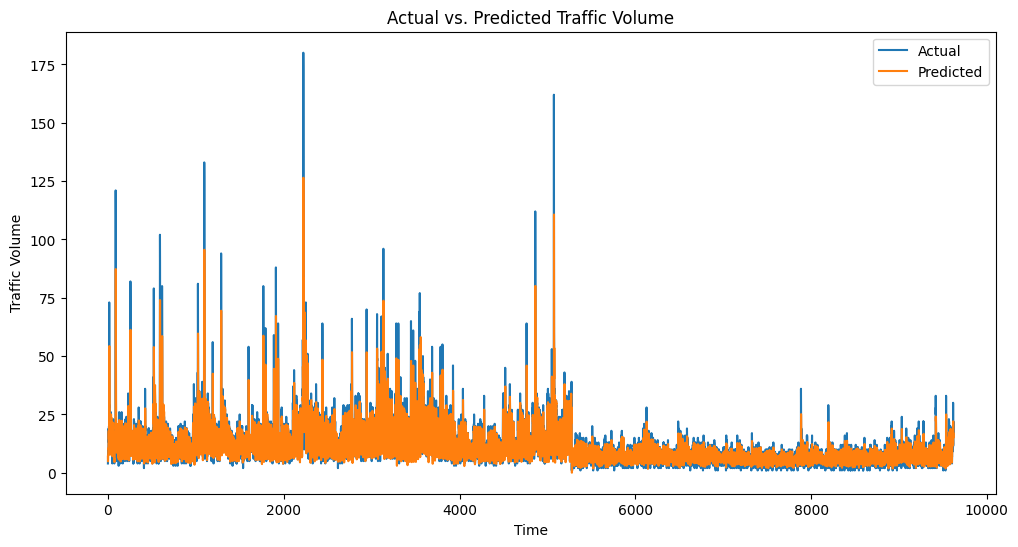

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Actual vs. Predicted Traffic Volume')
plt.legend()
plt.show()

# **Well done** :)